In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Data
from input_data import read_data_sets

# Model
import model as model

# Visualization
from plot_samples import plot_samples

In [4]:
data = read_data_sets(f=1)

In [5]:
# Placeholder Model
x = tf.placeholder(tf.float32, [None, 96 * 96])
W = tf.Variable(tf.zeros([96 * 96, 30]))
b = tf.Variable(tf.zeros([30]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 30])
mse = tf.reduce_mean(tf.square(y - y_))

In [6]:
# Initialize model
init = tf.global_variables_initializer()
train_loss = []
test_loss = []
eps = []
sess = tf.Session()
sess.run(init)
#data.train.reset_epochs()

# Training parameters
batch_size = 100
epochs = 50
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse)


In [18]:
# Train
for ep in range(epochs):
    for i in range(data.train.num_examples/batch_size):
        batch_xs, batch_ys = data.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    train_loss_ = sess.run(mse, feed_dict={x: data.train.images, y_: data.train.labels})
    test_loss_ = sess.run(mse, feed_dict={x: data.test.images, y_: data.test.labels})
    train_loss.append(train_loss_)
    test_loss.append(test_loss_)
    eps.append(data.train.epochs_completed + 1)
    if ep % 5 == 0:
        print "Epoch: %d Train loss: %.6f" % (data.train.epochs_completed + 1, train_loss_)

Epoch: 151 Train loss: 0.005260
Epoch: 156 Train loss: 0.005055
Epoch: 161 Train loss: 0.005321
Epoch: 166 Train loss: 0.004946
Epoch: 171 Train loss: 0.005603
Epoch: 176 Train loss: 0.004842
Epoch: 181 Train loss: 0.004856
Epoch: 186 Train loss: 0.004782
Epoch: 191 Train loss: 0.005092
Epoch: 196 Train loss: 0.004981


In [19]:
np.sqrt(0.0035) * 48

2.839718295887816

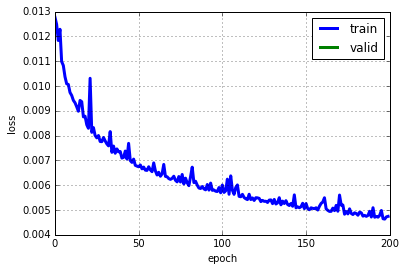

In [20]:
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(test_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.ylim(1e-3, 1e-1)
#plt.yscale("log")
plt.show()

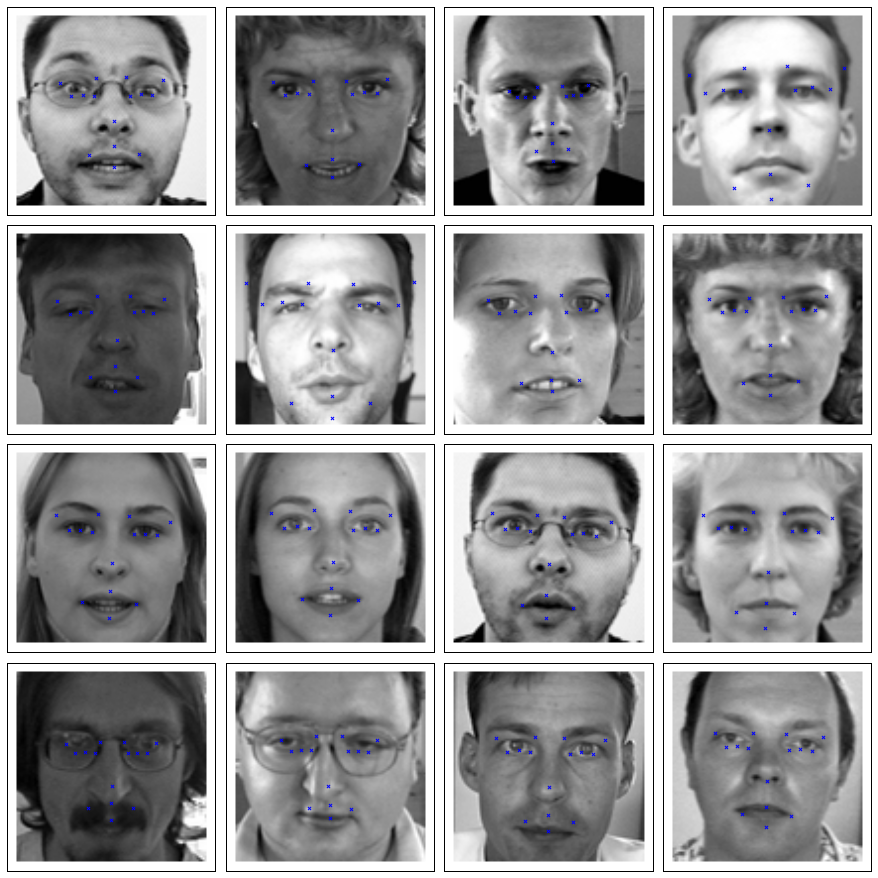

In [10]:
X_pred = data.predict.images
y_pred = sess.run(y, feed_dict={x: X_pred})
plot_samples(X_pred, y_pred)

In [11]:
from write_submission import write_submission

In [12]:
y_pred = sess.run(y, feed_dict={x: data.predict.images})

In [83]:
write_submission(y_pred)

Wrote submission/submission-2017-01-09T01-25-21.997808.csv
